In [2]:
from astropy import units as u
from astropy import constants as const
import numpy as np
import matplotlib.pyplot as plt
from astro530 import diff,Precision
from scipy import integrate

# Problem 4

In [2]:
## this defines a quadratic source function
def Source_func(t,a0,a1,a2):
    return a0 + (a1*t) + (a2*(t**2))

In [3]:
## this defines the integrand
def I_Integrand(t,a0,a1,a2):
    return Source_func(t,a0,a1,a2)*np.exp(-t)

In [4]:
## this is my new function integrator
# uses simpson integration
# also takes in the constants from the source function
def Func_Integrator2(function, min_t, max_t, width,a0,a1,a2):

    log10_min_t = np.log10(min_t)
    log10_max_t = np.log10(max_t)
    t = np.logspace(log10_min_t, log10_max_t, num=((log10_max_t-log10_min_t)/width).astype(int))
    y = function(t,a0,a1,a2)
    return integrate.simpson(y, t)

In [5]:
a0 = 10
a1 = 5
a2 = 3
mint = .001
maxt = 3000
widtht = 10**(-3)

I_value = Func_Integrator2(I_Integrand, mint, maxt, widtht,a0,a1,a2)
Source_value=Source_func(1,a0,a1,a2)
print("The Source func is :",Source_value)
print("The Intensity is:",I_value)

The Source func is : 18
The Intensity is: 20.990002498882397


## Min $\tau$

In [12]:
maxt = 50 #/(u.micrometer)
den = 10**(-4.5)
mint_stuff = np.logspace(-17,0,100) #/ u.micrometer
#print(minx_stuff)
#print(minx_stuff)
#print(Func_Integrator(Planck_num, , maxx, den, temp))
# use these to get Planck integrator values


mint_results = np.zeros(np.size(mint_stuff))

for x in range(np.size(mint_stuff)):
    mint_results[x] = Func_Integrator2(I_Integrand, mint_stuff[x], maxt, den, a0,a1,a2)


## plot Min $\tau$

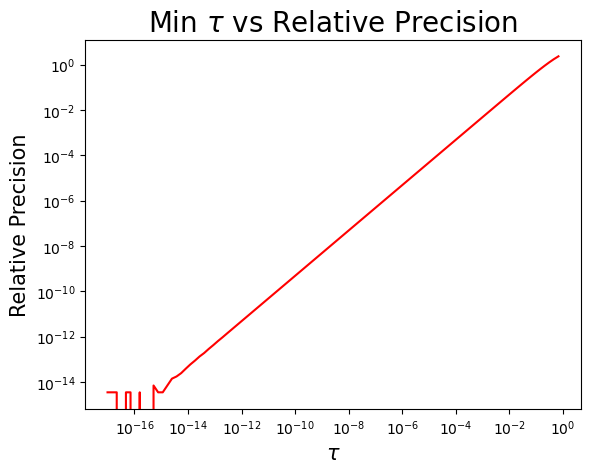

In [72]:
plt.plot(mint_stuff[:-1], diff(mint_results),'r')
plt.title(r"Min $\tau$ vs Relative Precision",fontsize=20)
plt.ylabel("Relative Precision",fontsize=15)
plt.xlabel(r"$\tau$",fontsize=15)
plt.yscale("log")
plt.xscale("log")
#plt.savefig('hw3_plot_1.svg', bbox_inches='tight')
plt.show()

## Max $\tau$

In [14]:
mint = 10**(-16) #/(u.micrometer)
den = 10**(-4.5)

maxt_stuff = np.linspace(1,100,100) #/ u.micrometer

# use these to get Planck integrator values
size = np.size(maxt_stuff)
maxt_results = np.zeros(size)

for x in range(size):
    maxt_results[x] = Func_Integrator2(I_Integrand, mint, maxt_stuff[x], den, a0,a1,a2)


## Plot Max $\tau$

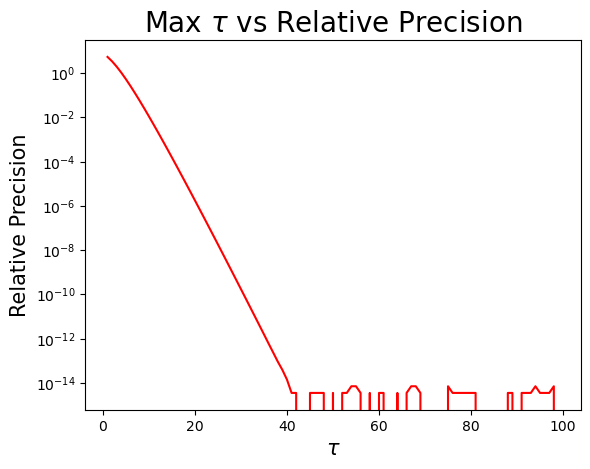

In [73]:
plt.plot(maxt_stuff[:-1], diff(maxt_results),'r')
plt.title(r"Max $\tau$ vs Relative Precision",fontsize=20)
plt.ylabel("Relative Precision",fontsize=15)
plt.xlabel(r"$\tau$",fontsize=15)
plt.yscale("log")
#plt.xscale("log")
#plt.savefig('hw3_plot_2.svg', bbox_inches='tight')
plt.show()

## Width of $\tau$

In [16]:

mint = 10**(-16)# /(u.micrometer)
maxt = 43 #/(u.micrometer)
width = np.flip(np.logspace(-5,-1,100))
# use these to get Planck integrator values
size = np.size(width)
width_results = np.zeros(size)

for x in range(size):
    width_results[x] = Func_Integrator2(I_Integrand, mint, maxt, width[x], a0,a1,a2)


## Plot Width of $\tau$

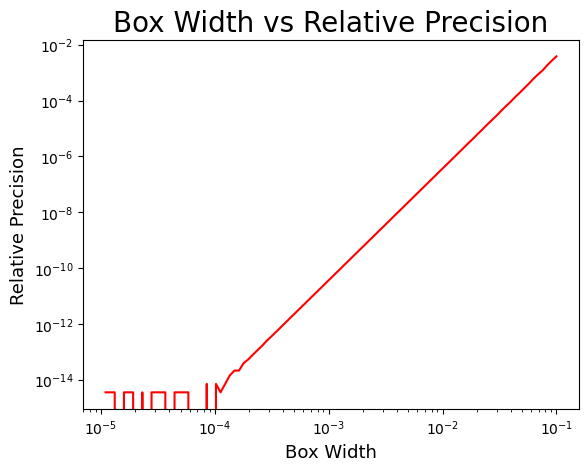

In [74]:

plt.plot(width[:-1], diff(width_results) ,'r')
plt.title("Box Width vs Relative Precision",fontsize=20)
plt.ylabel("Relative Precision",fontsize=13)
plt.xlabel("Box Width",fontsize=13)
plt.yscale("log")
plt.xscale("log")
#plt.savefig('hw3_plot_3.svg', bbox_inches='tight')
plt.show()

## Comparing The Source function E-B approx to the Source function

In [33]:
mint = 10**(-16) #/(u.micrometer)
den = 10**(-4.5)
maxt = 50
a2_stuff = np.linspace(-10,10,10)
a0=0
a1=0

# use these to get Planck integrator values
size = np.size(a2_stuff)
a2_results = np.zeros(size)
source_results = np.zeros(size)

for t in range(size):
    a2_results[t]   = Func_Integrator2(I_Integrand, mint, maxt, den, a0,a1,a2_stuff[t])
    source_results[t] = Source_func(1,a0,a1,a2_stuff[t])

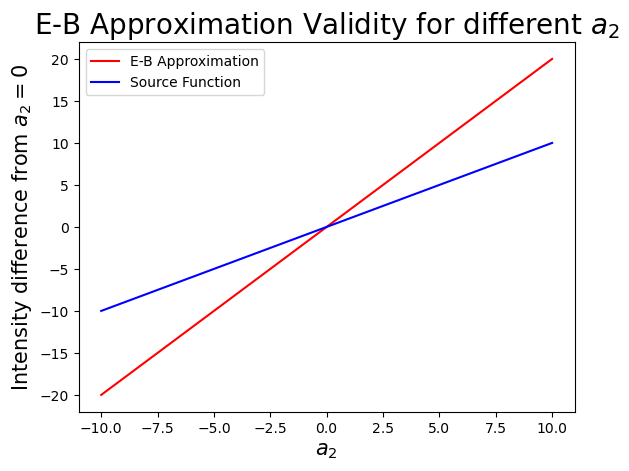

In [75]:
plt.plot(a2_stuff, a2_results,'r')
plt.plot(a2_stuff,source_results,'b')
plt.title(r"E-B Approximation Validity for different $a_2$",fontsize=20)
plt.ylabel("Intensity difference from $a_2=0$",fontsize=15)
plt.xlabel("$a_2$",fontsize=15)
plt.legend(["E-B Approximation","Source Function"])
#plt.yscale("log")
#plt.xscale("log")
#plt.savefig('hw3_plot_4.svg', bbox_inches='tight')
plt.show()

# Problem 5: Exponential Integrals

In [4]:
from scipy import special

## For $E_1:$

In [24]:
y1,err = integrate.quad(special.exp1, 0, 10**6)
print("For E_1 the integral is:",y1)
print("Analytical is",1)
print("Precision is:",Precision(1,y1))

For E_1 the integral is: 0.0
Analytical is 1
Precision is: 1.0


/tmp/ipykernel_4737/1452164520.py:6: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  y_stuff1[i],y_err1[i] = integrate.quad(special.exp1, 0, x)


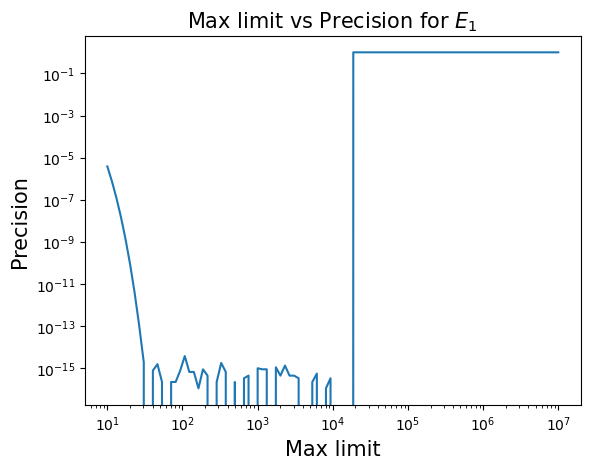

In [13]:
max_t=np.logspace(1,7,num=100)
y_stuff1 = np.zeros(max_t.size)
y_err1 = np.zeros(max_t.size)
i=0
for x in max_t:
    y_stuff1[i],y_err1[i] = integrate.quad(special.exp1, 0, x)
    i+=1
plt.plot(max_t,Precision(1,y_stuff1))
plt.xlabel("Max limit",fontsize=15)
plt.ylabel("Precision",fontsize=15)
plt.title(r"Max limit vs Precision for $E_1$",fontsize=15)
plt.xscale("log")
plt.yscale("log")
plt.savefig('hw3_plot_5.svg', bbox_inches='tight')
plt.show()

## For $E_2:$

In [14]:
expn = lambda x,a: special.expn(a,x)

y2,err2 = integrate.quad(expn,0,10000,args=(2,))
print("For E_2 the integral is:",y2)
print("Analytical is",1/2)
print("Precision is:",Precision(.5,y2))

For E_2 the integral is: 0.5
Analytical is 0.5
Precision is: 0.0


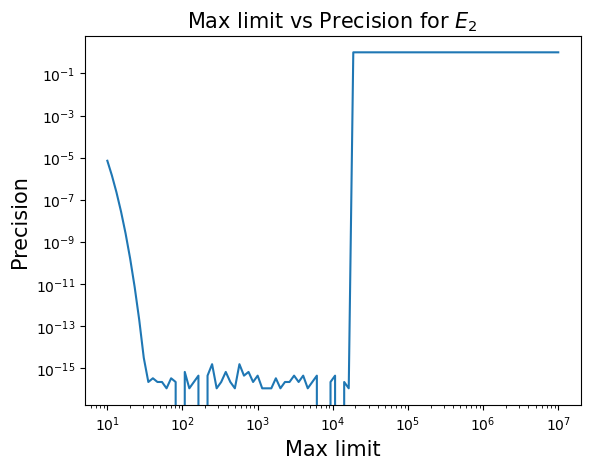

In [15]:
max_t=np.logspace(1,7,num=100)
y_stuff2 = np.zeros(max_t.size)
y_err2 = np.zeros(max_t.size)
i=0
for x in max_t:
    y_stuff2[i],y_err2[i] = integrate.quad(expn,0,x,args=(2,))
    i+=1
plt.plot(max_t,Precision(1/2,y_stuff2))
plt.xlabel("Max limit",fontsize=15)
plt.ylabel("Precision",fontsize=15)
plt.title(r"Max limit vs Precision for $E_2$",fontsize=15)
plt.xscale("log")
plt.yscale("log")
plt.savefig('hw3_plot_6.svg', bbox_inches='tight')
plt.show()

## For $E_3:$

In [26]:
y3,err3 = integrate.quad(expn,0,100000,args=(3,))
print("For E_2 the integral is:",y3)
print("Analytical is",1/3)
print("Precision is:",Precision(1/3,y3))

For E_2 the integral is: 1.8480994917842628e-47
Analytical is 0.3333333333333333
Precision is: 1.0


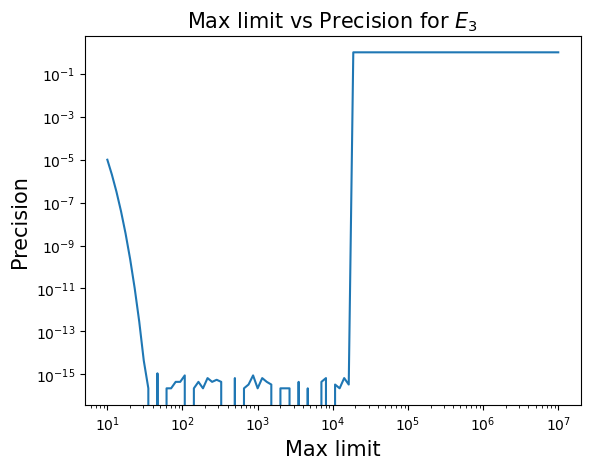

In [17]:
max_t=np.logspace(1,7,num=100)
y_stuff3 = np.zeros(max_t.size)
y_err3 = np.zeros(max_t.size)
i=0
for x in max_t:
    y_stuff3[i],y_err3[i] = integrate.quad(expn,0,x,args=(3,))
    i+=1
plt.plot(max_t,Precision(1/3,y_stuff3))
plt.xlabel("Max limit",fontsize=15)
plt.ylabel("Precision",fontsize=15)
plt.title(r"Max limit vs Precision for $E_3$",fontsize=15)
plt.xscale("log")
plt.yscale("log")
plt.savefig('hw3_plot_7.svg', bbox_inches='tight')
plt.show()